In [5]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

# load the first data

In [6]:
row_data = pd.read_csv('1.04. Real-life example.csv')
row_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [7]:
row_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
data = row_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [9]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [10]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [11]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


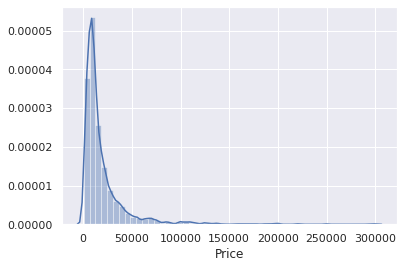

In [12]:
sns.distplot(data_no_mv['Price'])

In [13]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage']<q]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3985.000000,3985.000000,3985.000000,3985.000000
mean,19665.292336,159.961606,2.768597,2006.476537
std,25891.451288,96.720077,4.959920,6.618856
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,90.000000,1.800000,2003.000000
50%,11500.000000,157.000000,2.200000,2008.000000
75%,21950.000000,227.000000,3.000000,2012.000000
max,300000.000000,435.000000,99.990000,2016.000000


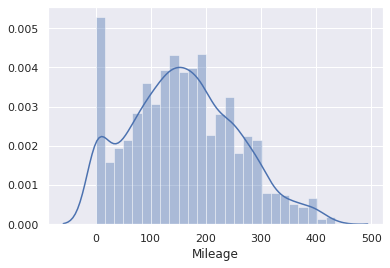

In [15]:
sns.distplot(data_2['Mileage'])

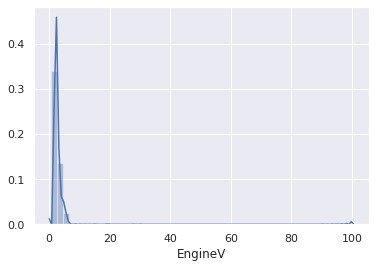

In [16]:
sns.distplot(data_2['EngineV'])

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3962,3962.000000,3962,3962.000000,3962.000000,3962,3962,3962.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1505,NaN,NaN,1826,3600,NaN
mean,NaN,19729.319525,NaN,159.750631,2.467751,NaN,NaN,2006.492933
std,NaN,25946.401719,NaN,96.761261,0.975501,NaN,NaN,6.618662
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21999.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


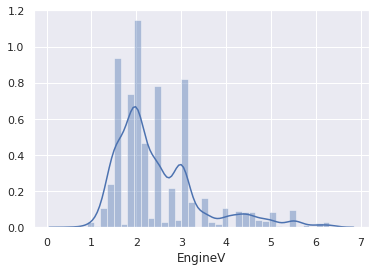

In [18]:
sns.distplot(data_3['EngineV'])

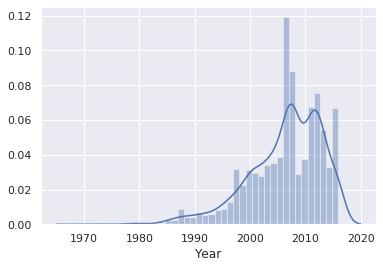

In [19]:
sns.distplot(data_3['Year'])

In [20]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
data_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3908,3908.000000,3908,3908.000000,3908.000000,3908,3908,3908.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1473,NaN,NaN,1815,3546,NaN
mean,NaN,19957.247725,NaN,159.000000,2.474956,NaN,NaN,2006.794780
std,NaN,26046.394303,NaN,96.331657,0.978763,NaN,NaN,6.129926
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7248.750000,NaN,89.750000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [21]:
data_cleaned = data_4.reset_index(drop='True')

In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3908,3908.000000,3908,3908.000000,3908.000000,3908,3908,3908.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1473,NaN,NaN,1815,3546,NaN
mean,NaN,19957.247725,NaN,159.000000,2.474956,NaN,NaN,2006.794780
std,NaN,26046.394303,NaN,96.331657,0.978763,NaN,NaN,6.129926
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7248.750000,NaN,89.750000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# checking ols assumptions

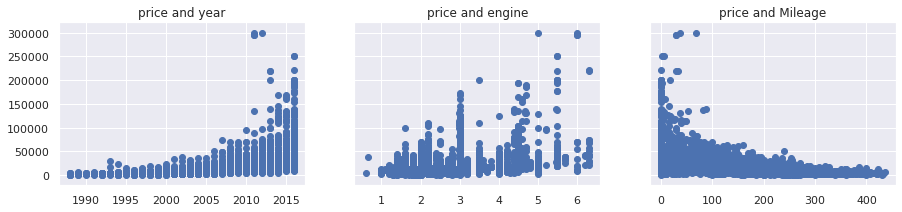

In [23]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("price and year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title("price and engine")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title("price and Mileage")
plt.show()

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.describe()

,Price,Mileage,EngineV,Year,log_price
count,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000
mean,19957.247725,159.000000,2.474956,2006.794780,9.443901
std,26046.394303,96.331657,0.978763,6.129926,0.914350
min,800.000000,0.000000,0.600000,1988.000000,6.684612
25%,7248.750000,89.750000,1.800000,2003.000000,8.888584
50%,11800.000000,155.500000,2.200000,2008.000000,9.375855
75%,22000.000000,225.000000,3.000000,2012.000000,9.998798
max,300000.000000,435.000000,6.300000,2016.000000,12.611538


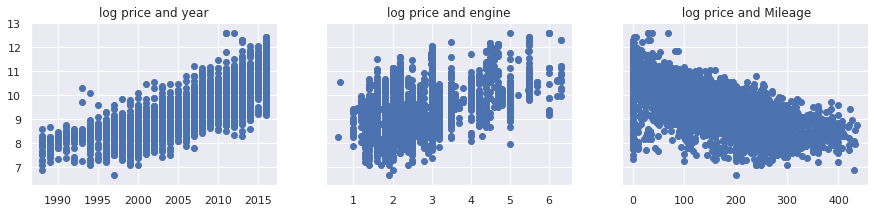

In [25]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("log price and year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title("log price and engine")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title(" log price and Mileage")
plt.show()

In [26]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [27]:
data_cleaned.describe()

,Mileage,EngineV,Year,log_price
count,3908.000000,3908.000000,3908.000000,3908.000000
mean,159.000000,2.474956,2006.794780,9.443901
std,96.331657,0.978763,6.129926,0.914350
min,0.000000,0.600000,1988.000000,6.684612
25%,89.750000,1.800000,2003.000000,8.888584
50%,155.500000,2.200000,2008.000000,9.375855
75%,225.000000,3.000000,2012.000000,9.998798
max,435.000000,6.300000,2016.000000,12.611538


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["features"] = variables.columns

In [29]:
vif

,VIF,features
0,3.700541,Mileage
1,10.317095,Year
2,7.401772,EngineV


multicollinearity - value above 6 is ussually considered multicollinearity

In [30]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)

In [31]:
data_no_multicollinearity.describe()

,Mileage,EngineV,log_price
count,3908.000000,3908.000000,3908.000000
mean,159.000000,2.474956,9.443901
std,96.331657,0.978763,0.914350
min,0.000000,0.600000,6.684612
25%,89.750000,1.800000,8.888584
50%,155.500000,2.200000,9.375855
75%,225.000000,3.000000,9.998798
max,435.000000,6.300000,12.611538


# Create dummy variables

In [32]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first= True)

In [33]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# rearange the data

In [34]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [35]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [36]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [37]:
variables = data_preprocessed.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["features"] = variables.columns

In [38]:
vif[vif['VIF']>6] 

,VIF,features
1,7.720146,EngineV
16,9.672979,Registration_yes


# Linear regression

In [39]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis = 1)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
inputs_scaled = scaler.transform(inputs)

In [42]:
#  train test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [45]:
reg = LinearRegression()

In [46]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_hat=reg.predict(x_train)

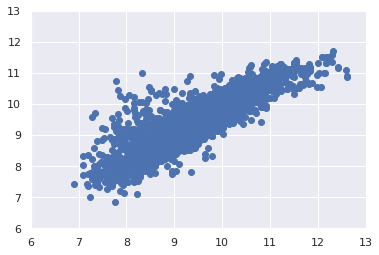

In [48]:
plt.scatter(y_train,y_hat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [49]:
reg.score(inputs_scaled,target)

0.7584334726562976

In [50]:
error = y_hat-y_train

Text(0.5, 1.0, 'residual plot')

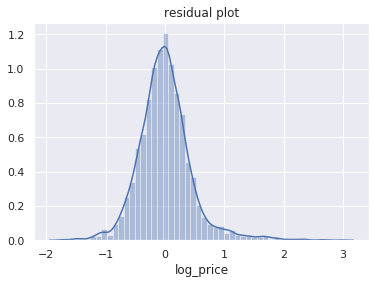

In [51]:
sns.distplot(error)
plt.title("residual plot")

In [52]:
reg.coef_

array([-0.47574079,  0.25407   ,  0.02061931,  0.02985439, -0.133047  ,
       -0.16786884, -0.05284677, -0.07626141, -0.13728287, -0.09274146,
       -0.19164293, -0.11029495, -0.15924995, -0.12143158, -0.02965608,
       -0.1386294 ,  0.31472585])

In [53]:
reg.intercept_

9.439335081336479

In [54]:
summery_reg = pd.DataFrame(inputs.columns.values,columns=["features"])
summery_reg['weights']=reg.coef_
summery_reg

,features,weights
0,Mileage,-0.475741
1,EngineV,0.254070
2,Brand_BMW,0.020619
3,Brand_Mercedes-Benz,0.029854
4,Brand_Mitsubishi,-0.133047
5,Brand_Renault,-0.167869
6,Brand_Toyota,-0.052847
7,Brand_Volkswagen,-0.076261
8,Body_hatch,-0.137283
9,Body_other,-0.092741


In [74]:
y_hat_test = reg.predict(x_test)
y_hat_test.shape

(782,)

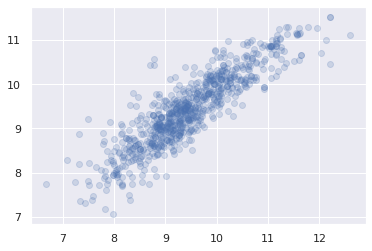

In [56]:
plt.scatter(y_test,y_hat_test, alpha=0.2)

In [57]:
test_error = y_hat_test - y_test

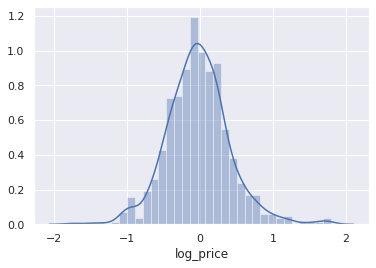

In [58]:
sns.distplot(test_error)

In [59]:
sum(error*error)

643.1492292306531

In [60]:
y_hat_test

array([ 7.82339536,  8.91877083,  9.52551167,  8.92969839,  9.70428677,
        9.08371286,  9.03076738,  8.535416  ,  9.88581053,  9.29341757,
        8.05353546,  8.58863159, 10.6953597 ,  9.12993663,  8.78411085,
        9.20891827,  8.64738417, 10.28872104,  9.23613447,  9.43704767,
        9.79759099,  9.33814048,  9.23158788, 10.77227053,  8.14499429,
        7.18780967,  8.751141  , 10.78025223,  9.89391049,  8.64572593,
        9.56570184,  9.47345282, 10.19166124,  9.94105653, 10.08889943,
        9.46602036,  8.68857657, 11.05272034,  9.09276054,  9.42421859,
        9.99573075,  9.01860405, 10.13126342,  8.66548274,  8.57674582,
        8.45280855, 11.1450003 ,  8.28567803,  9.41710328,  8.16467337,
        8.25449053, 10.64975669, 10.11864946,  8.35469631, 10.38397776,
        9.08315148, 10.09382151,  8.73463159, 10.39097761,  8.87081237,
        9.77002451,  9.39164392,  8.65728111,  7.48552703,  9.55546544,
       10.11739513,  9.10431281, 10.37207648,  9.29457117,  8.26

In [61]:
sum(test_error*test_error)

145.90162074196462

In [75]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['prediction'])
df_pf.head()
df_pf.shape

(782, 1)

In [63]:
df_pf['target'] = np.exp(y_test)

In [64]:
df_pf.head()

,prediction,target
0,2498.373911,NaN
1,7470.900575,7900.0
2,13704.940525,NaN
3,7552.986953,NaN
4,16387.707226,NaN


In [65]:
df_pf['target_log'] = y_test
df_pf.head()

,prediction,target,target_log
0,2498.373911,NaN,NaN
1,7470.900575,7900.0,8.974618
2,13704.940525,NaN,NaN
3,7552.986953,NaN,NaN
4,16387.707226,NaN,NaN


In [66]:
df_pf= df_pf.drop(['target_log'],axis = 1)

In [67]:
y_test = y_test.reset_index(drop=True)

In [68]:
y_test.head()

0    7.495542
1    9.287301
2    9.609116
3    9.305651
4    9.740910
Name: log_price, dtype: float64

In [69]:
df_pf['residuals']=df_pf['prediction']-df_pf['target']

In [70]:
df_pf.head()

,prediction,target,residuals
0,2498.373911,NaN,NaN
1,7470.900575,7900.0,-429.099425
2,13704.940525,NaN,NaN
3,7552.986953,NaN,NaN
4,16387.707226,NaN,NaN


In [71]:
df_pf['difference'] =np.absolute(df_pf['residuals']/df_pf['target']*100)

In [72]:
df_pf.describe()

,prediction,target,residuals,difference
count,782.000000,145.000000,145.000000,145.000000
mean,17240.543316,20387.386897,-6510.460893,134.935910
std,15375.969619,27680.949923,30519.410078,271.896298
min,1178.895558,1400.000000,-197579.385499,0.693234
25%,7180.006622,7600.000000,-10570.003208,39.023270
50%,11951.216755,12000.000000,-1206.352818,69.051846
75%,22421.395880,22000.000000,7210.484828,107.097808
max,99808.451254,199999.000000,58707.620346,2348.304814


In [73]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x:'%.2f' %x)
df_pf.sort_values(by=['difference'])

,prediction,target,residuals,difference
420,6951.47,7000.00,-48.53,0.69
212,8779.37,8900.00,-120.63,1.36
1,7470.90,7900.00,-429.10,5.43
728,11807.75,12500.00,-692.25,5.54
393,13856.62,15000.00,-1143.38,7.62
454,8164.67,8900.00,-735.33,8.26
330,13052.77,12000.00,1052.77,8.77
710,9744.25,8800.00,944.25,10.73
749,8678.29,7800.00,878.29,11.26
325,8293.65,9500.00,-1206.35,12.70
